In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/taxitrip.csv')

In [ ]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [ ]:
df.shape

(209673, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [ ]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [ ]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

<Axes: >

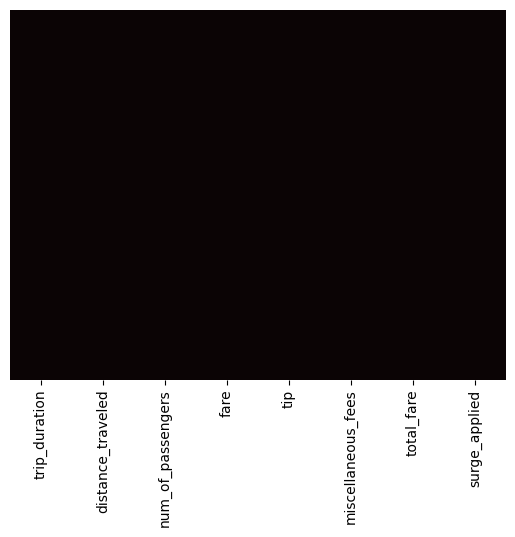

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
df.duplicated().sum()

4325

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(205348, 8)

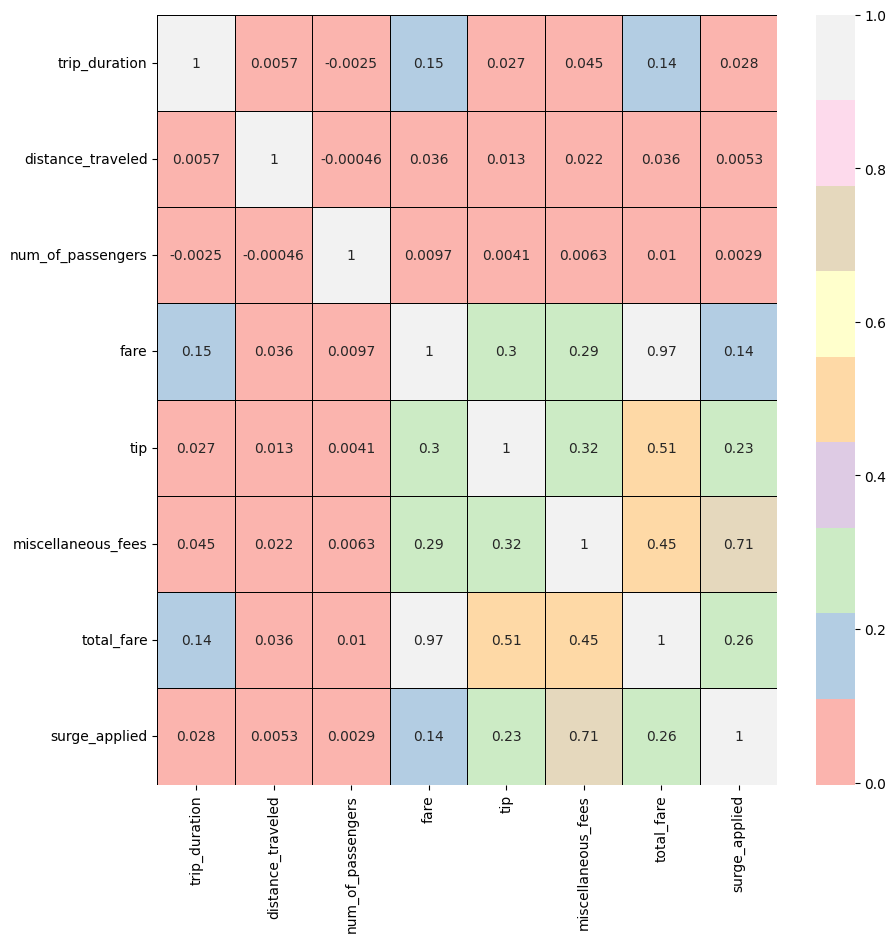

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Pastel1', linecolor='black', linewidths=0.5, annot=True)
plt.show()

### distance_traveled and num_of_passengers are very lessly correlated so we removed that.

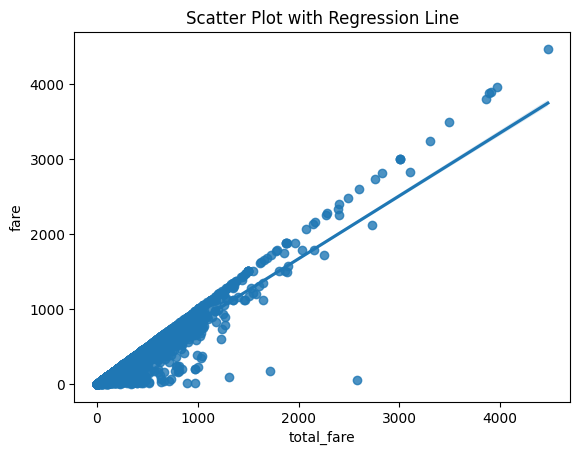

In [ ]:
sns.regplot(x='total_fare', y='fare', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('total_fare')
plt.ylabel('fare')
plt.show()

### Total fare and fare are positively correlated

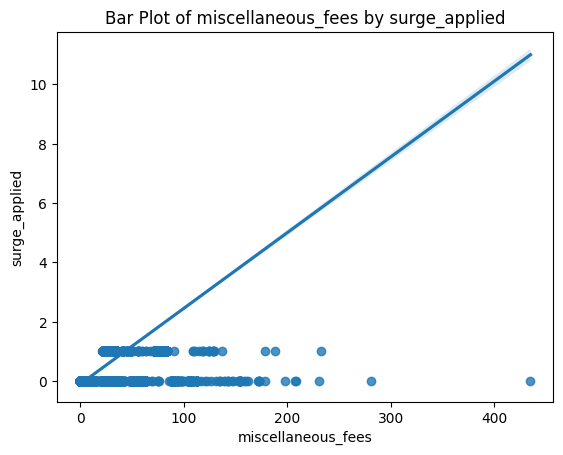

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(x='miscellaneous_fees', y='surge_applied', data=df)

# plt.title('Bar Plot of miscellaneous_fees by surge_applied')
# plt.xlabel('Miscellaneous Fees')
# plt.ylabel('Surge Applied')

plt.show()
sns.regplot(x='miscellaneous_fees', y='surge_applied', data=df)
plt.title('Bar Plot of miscellaneous_fees by surge_applied')
plt.xlabel('miscellaneous_fees')
plt.ylabel('surge_applied')
plt.show()

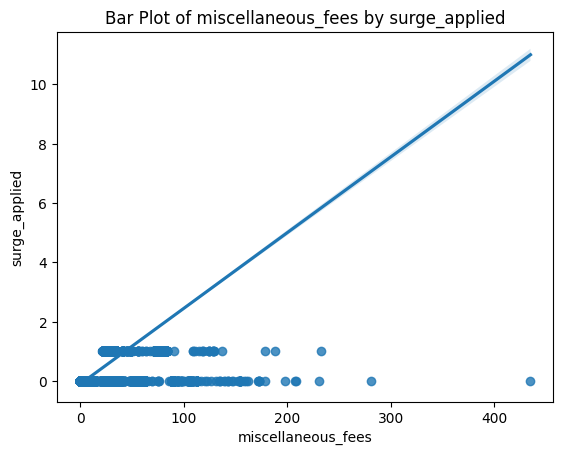

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.show()
sns.regplot(x='miscellaneous_fees', y='surge_applied', data=df)
plt.title('Bar Plot of miscellaneous_fees by surge_applied')
plt.xlabel('miscellaneous_fees')
plt.ylabel('surge_applied')
plt.show()

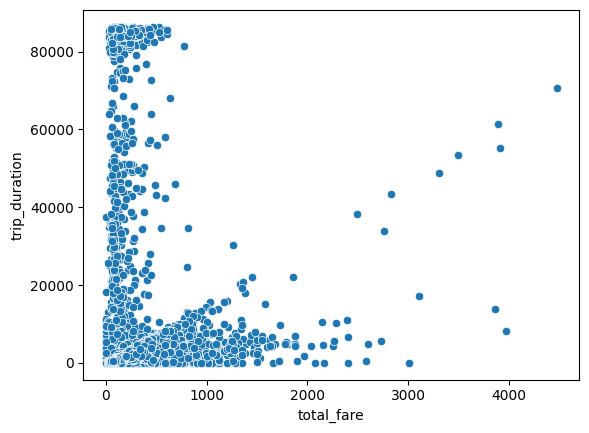

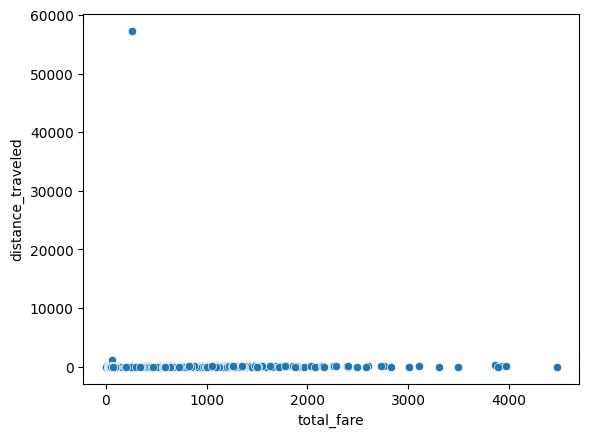

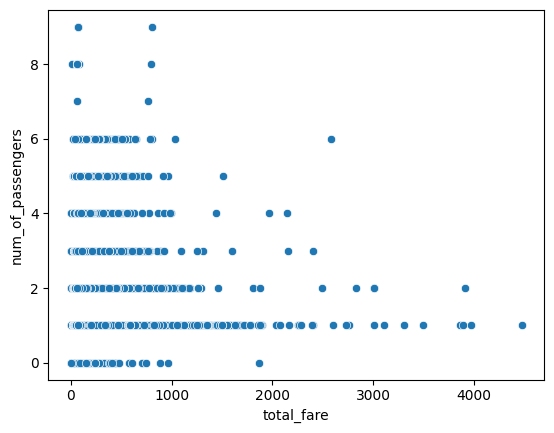

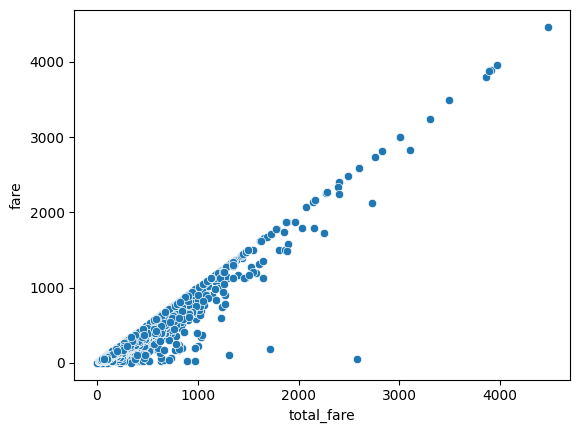

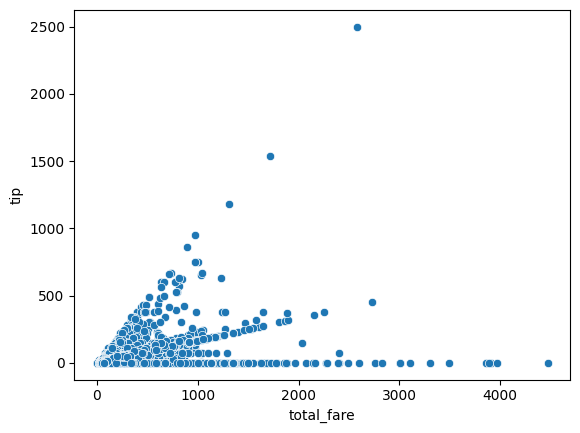

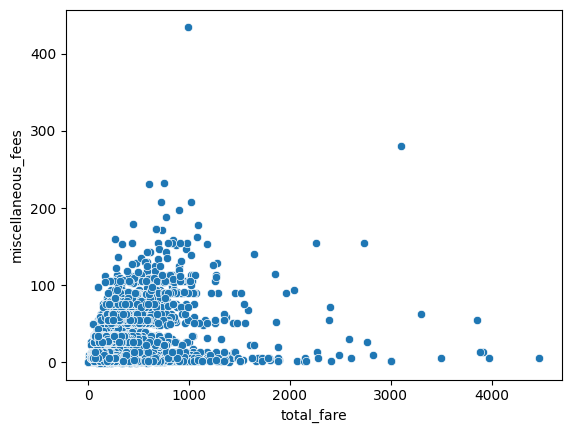

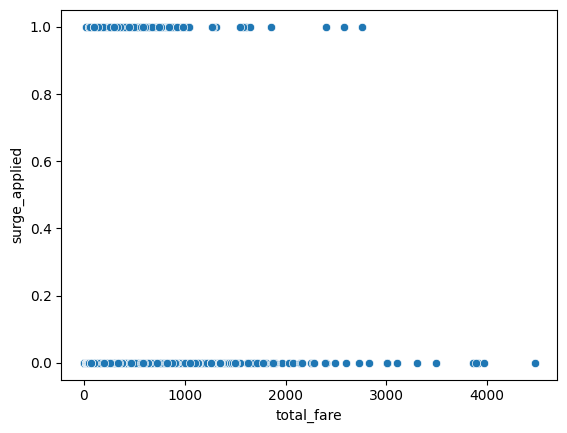

In [ ]:
for col in df.columns:
    if col != 'total_fare':
        sns.scatterplot(x=df['total_fare'], y=df[col])
        plt.show()

### Total fare had high density around 1 to 1000
### Total fare are highest for 1 passenger

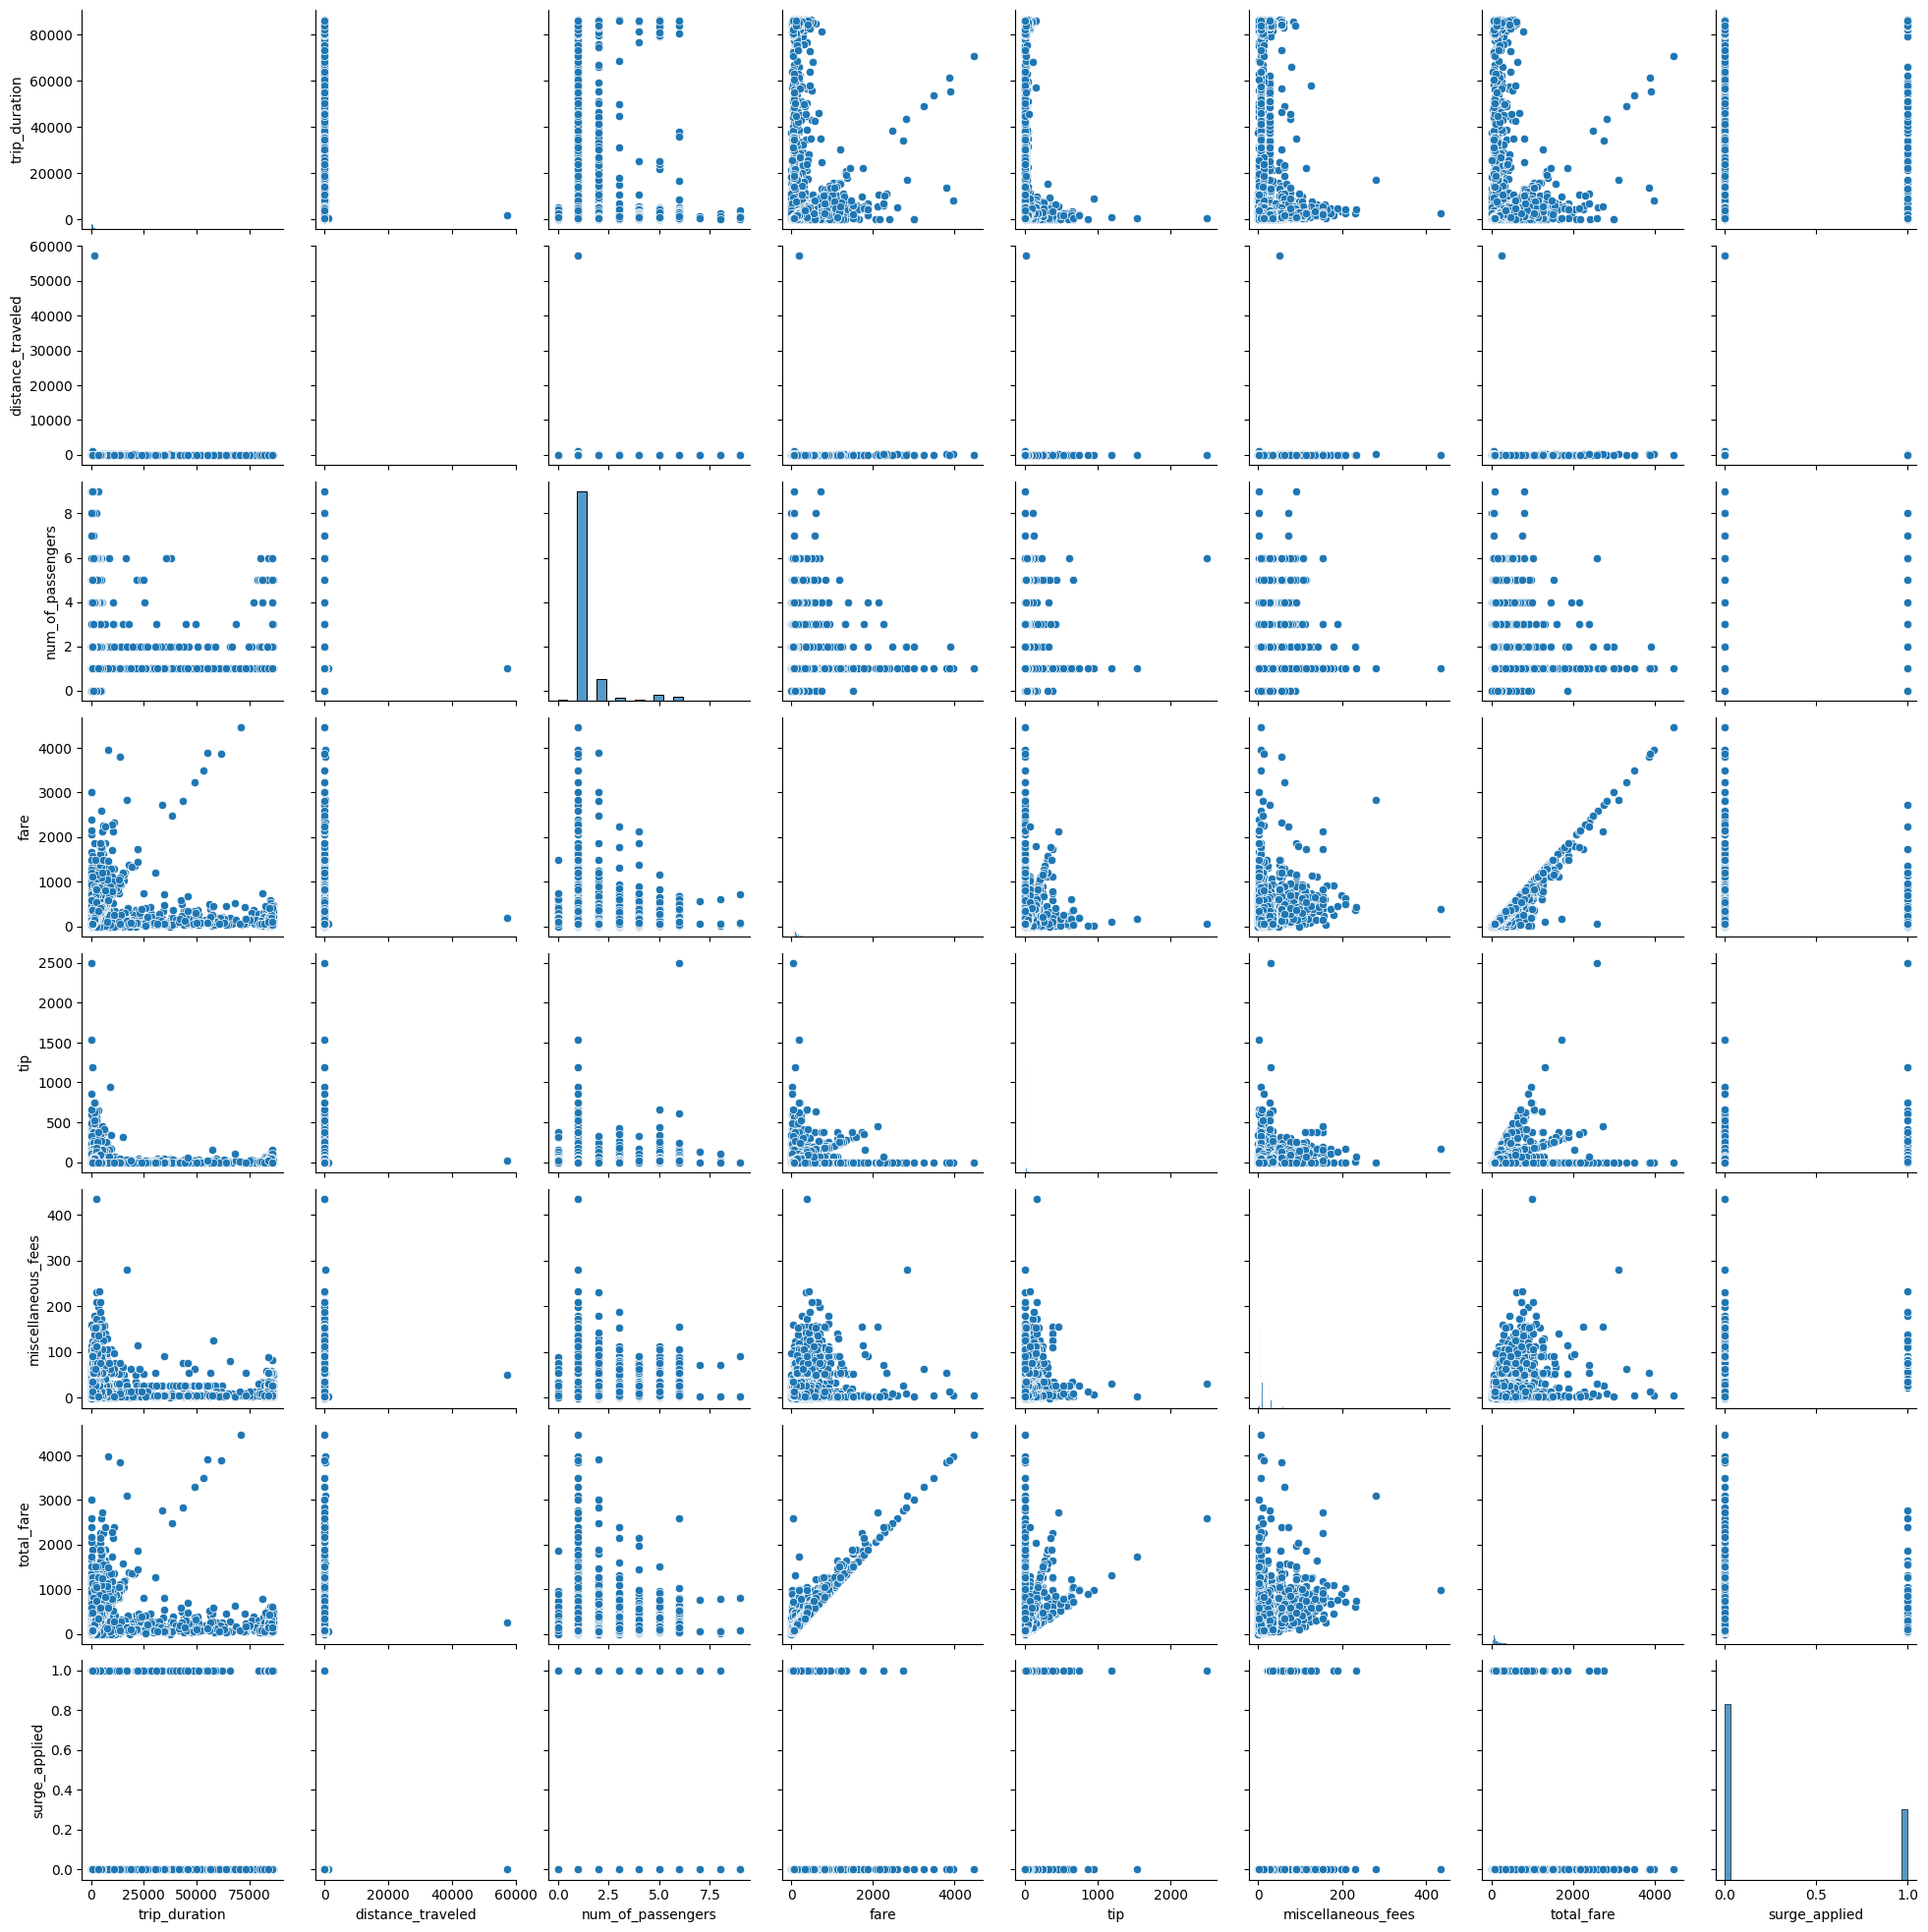

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [ ]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [ ]:
df.drop(['distance_traveled','num_of_passengers'],axis=1)

,trip_duration,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,75.00,24,6.300,105.300,0
1,1187.0,105.00,24,13.200,142.200,0
2,730.0,71.25,0,26.625,97.875,1
3,671.0,90.00,0,9.750,99.750,0
4,329.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...
209668,1617.0,150.00,47,5.800,202.800,0
209669,438.0,48.75,12,34.575,95.325,1
209670,571.0,63.75,0,6.000,69.750,0
209671,491.0,56.25,0,13.500,69.750,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns='total_fare')
y = df['total_fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
STD = StandardScaler()

In [ ]:
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()
LR.fit(X_train_SD, y_train)
y_pred = LR.predict(X_test_SD)

In [ ]:
y_train_pred = LR.predict(X_train_SD)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
print("accuracy score : ",r2_score(y_pred,y_test))
print("mse: ", mean_squared_error(y_pred, y_test))
print("mae: ", mean_absolute_error(y_pred, y_test))

accuracy score :  1.0
mse:  8.969136554422116e-27
mae:  5.043023867181186e-14


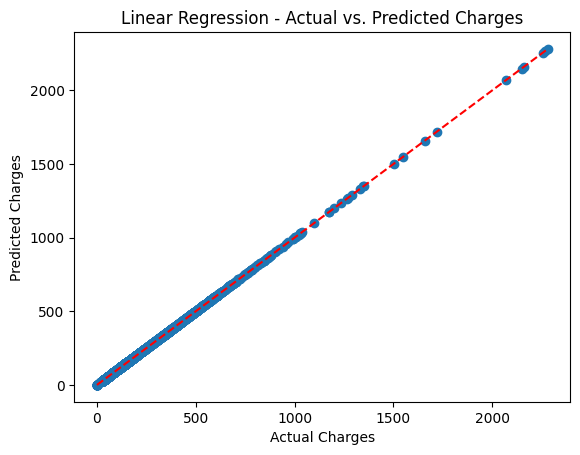

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        # 1 x1 y1 z1
        # 1 x2 y2 z2
        # 1 x3 y3 z3

        X_transpose = np.transpose(X) #transpose
        self.coefficients = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
        # beta = (X.X^T)-1 . X^T . y  where y= target column
        self.intercept_ = self.coefficients[0]
        self.coef_ = self.coefficients[1:]

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        return X.dot(self.coefficients)

LR = LinearRegression()
LR.fit(X_train_SD, y_train)

y_custom_pred = LR.predict(X_test_SD)



Intercept: 129.23202072097294
Coefficients: [-1.03194363e-14  1.25648190e-15 -3.35235312e-16  8.72261219e+01
  2.06424409e+01  1.26089471e+01  5.44495005e-14]


In [ ]:


print("accuracy score : ",r2_score(y_custom_pred,y_test))
print("mse: ", mean_squared_error(y_custom_pred, y_test))
print("mae: ", mean_absolute_error(y_custom_pred, y_test))

accuracy score :  1.0
mse:  5.170014396517515e-27
mae:  4.0687395016354794e-14
